<a href="https://colab.research.google.com/github/archangel2006/PYML-2025/blob/main/PYML10%20(Feature%20Engineering%20-%20Scaling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.shape

(400, 5)

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
60,15814004,Male,27,20000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Student ID is not useful in Scaling, so we can drop that.

df.drop('User ID', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# .fit_transform() : Does 2 things-
# fit(): learns the unique values in the column (eg, 'Male','Female')
# transform() : converts each unqiue values into number. ('Male'→1, 'Female'→0)

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
features=df[['Age','EstimatedSalary']]

# selects only the 'Age' and 'EstimatedSalary' columns from the DataFrame and stores them in new variable called 'features'.

In [ ]:
features.shape

(400, 2)

In [ ]:
features.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


# VIsualize Data Distribution (Before Scaling)

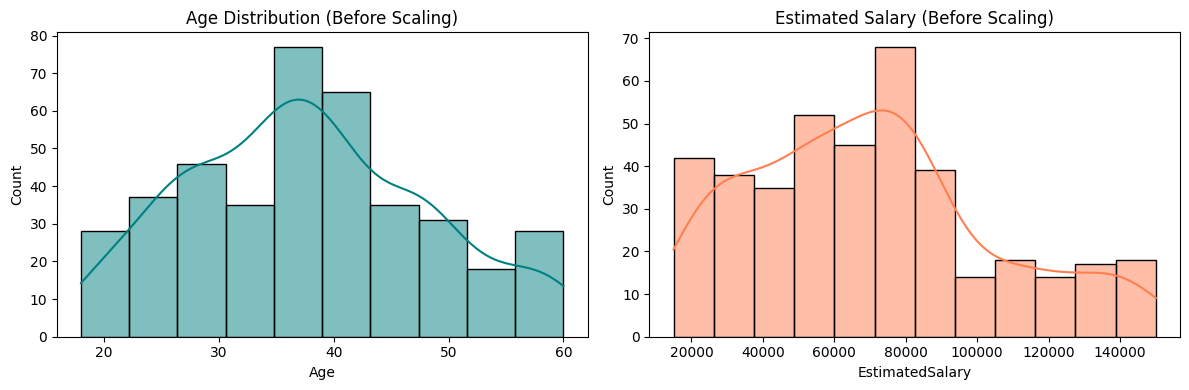

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.histplot(df['Age'],kde=True,color='teal')
plt.title('Age Distribution (Before Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.histplot(df['EstimatedSalary'],kde=True,color='coral')
plt.title('Estimated Salary (Before Scaling)')

plt.tight_layout()
plt.show()

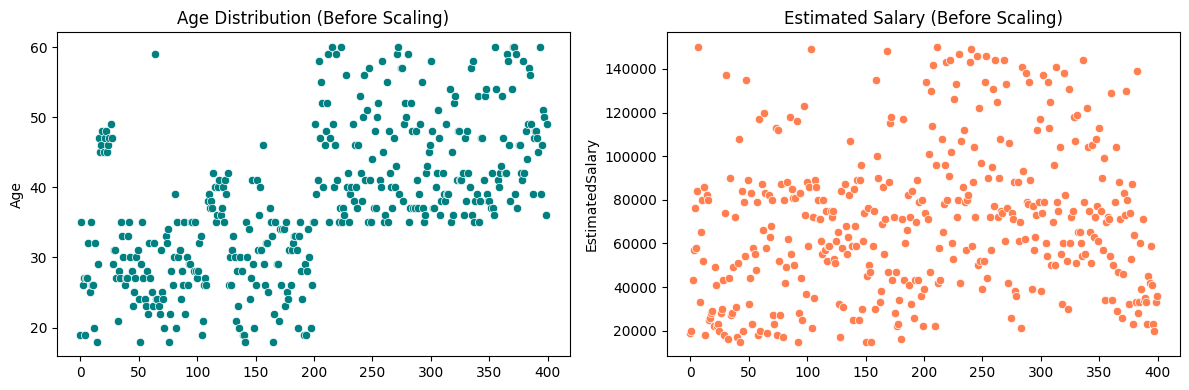

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.scatterplot(df['Age'],color='teal')
plt.title('Age Distribution (Before Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(df['EstimatedSalary'],color='coral')
plt.title('Estimated Salary (Before Scaling)')

plt.tight_layout()
plt.show()

In [ ]:
age_skew_before = df['Age'].skew()
print(f'Skewness (Before Scaling): {age_skew_before} ')

Skewness (Before Scaling): 0.23133746309642822 


In [ ]:
estimatedsalary_skew_before = df['EstimatedSalary'].skew()
print(f'Skewness (Before Scaling): {estimatedsalary_skew_before} ')

Skewness (Before Scaling): 0.49502362888993623 


# STANDARD SCALAR

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Apply standard scalar
scaler=StandardScaler()
scaled_standard = scaler.fit_transform(features)

In [ ]:
df_standard_scaled=pd.DataFrame(scaled_standard,columns=['Age_Standard','Salary_Standard'])
df_standard_scaled.head()

,Age_Standard,Salary_Standard
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


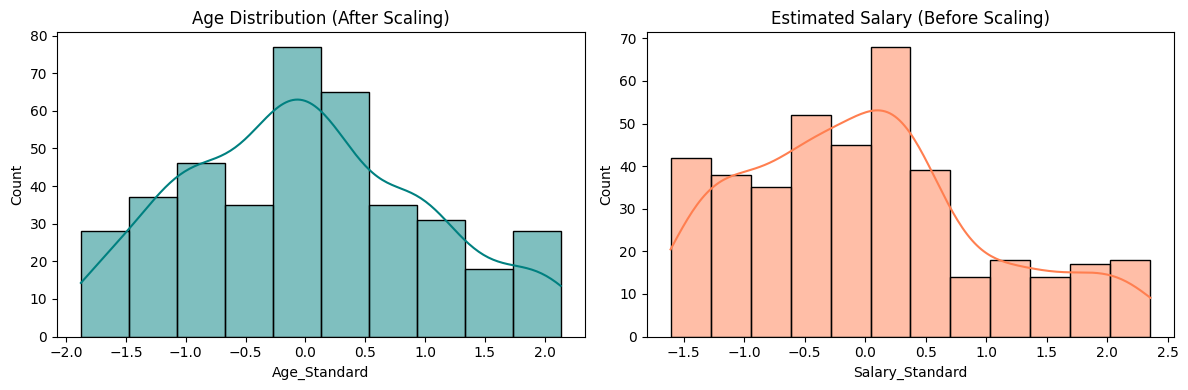

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.histplot(x='Age_Standard',kde=True,color='teal',data=df_standard_scaled)
plt.title('Age Distribution (After Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.histplot(x='Salary_Standard',kde=True,color='coral',data=df_standard_scaled)
plt.title('Estimated Salary (Before Scaling)')

plt.tight_layout()
plt.show()

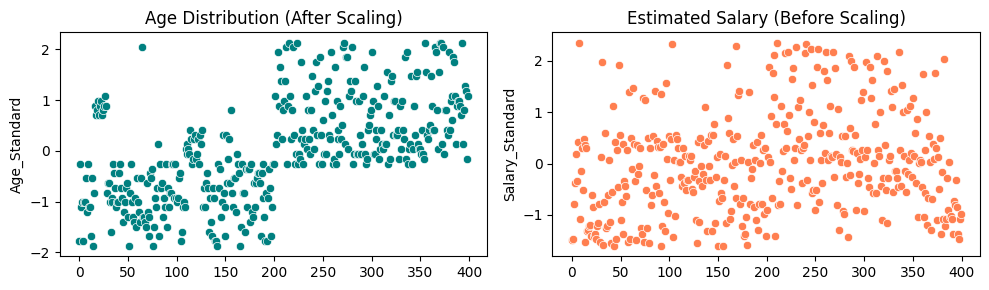

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.scatterplot(df_standard_scaled['Age_Standard'],color='teal')
plt.title('Age Distribution (After Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(df_standard_scaled['Salary_Standard'],color='coral')
plt.title('Estimated Salary (Before Scaling)')

plt.tight_layout()
plt.show()

# MIN MAX SCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaled_minmax = scaler.fit_transform(features)

In [ ]:
df_scaled_minmax =  pd.DataFrame(scaled_minmax,columns=['Age_Standard','Salary_Standard'])
df_scaled_minmax.head()

,Age_Standard,Salary_Standard
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852


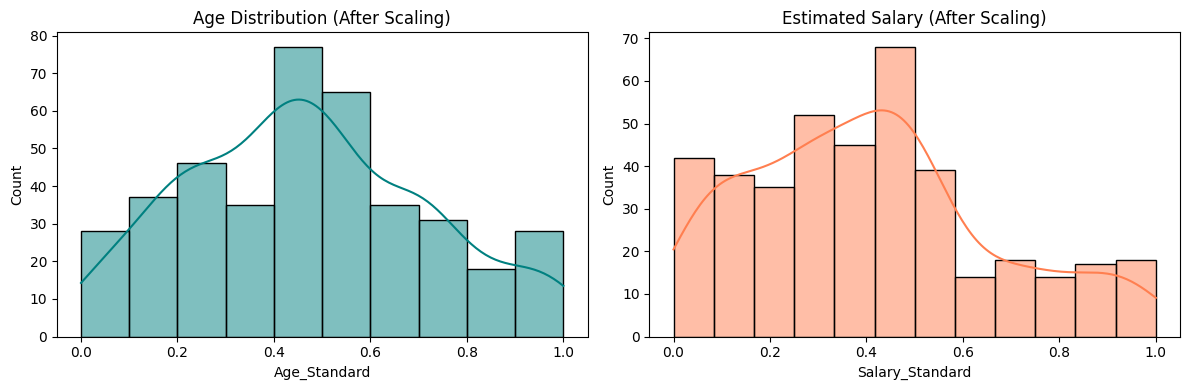

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.histplot(x='Age_Standard',kde=True,color='teal',data=df_scaled_minmax)
plt.title('Age Distribution (After Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.histplot(x='Salary_Standard',kde=True,color='coral',data=df_scaled_minmax)
plt.title('Estimated Salary (After Scaling)')

plt.tight_layout()
plt.show()

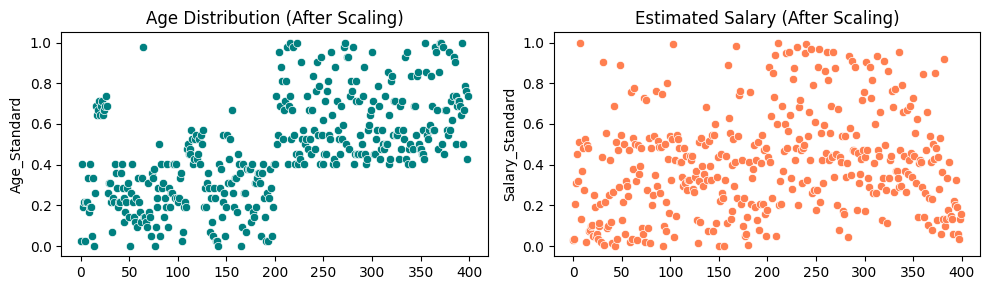

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.scatterplot(df_scaled_minmax['Age_Standard'],color='teal')
plt.title('Age Distribution (After Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(df_scaled_minmax['Salary_Standard'],color='coral')
plt.title('Estimated Salary (After Scaling)')

plt.tight_layout()
plt.show()

# ROBUST SCALING

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler=RobustScaler()
scaled_robust = scaler.fit_transform(features)

In [ ]:
df_scaled_robust = pd.DataFrame(scaled_robust,columns=['Age_Robust','Salary_Robust'])
df_scaled_robust.head()

,Age_Robust,Salary_Robust
0,-1.107692,-1.133333
1,-0.123077,-1.111111
2,-0.676923,-0.600000
3,-0.615385,-0.288889
4,-1.107692,0.133333


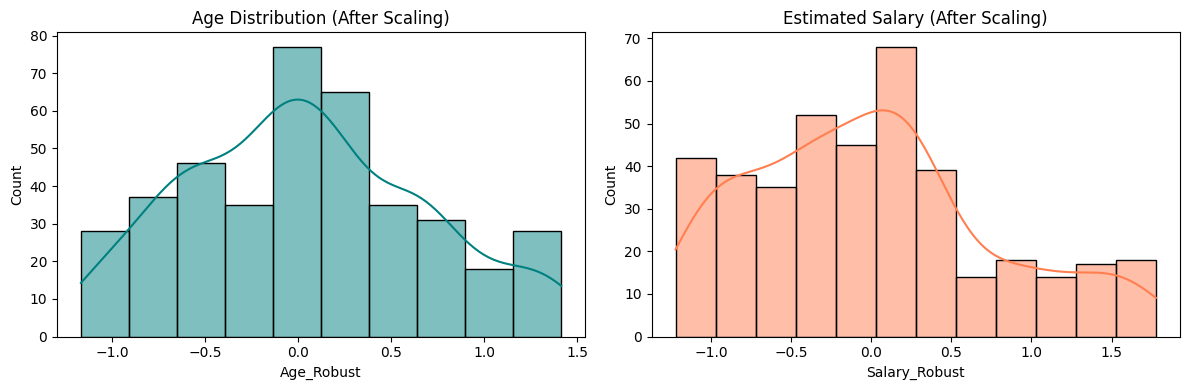

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.histplot(x='Age_Robust',kde=True,color='teal',data=df_scaled_robust)
plt.title('Age Distribution (After Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.histplot(x='Salary_Robust',kde=True,color='coral',data=df_scaled_robust)
plt.title('Estimated Salary (After Scaling)')

plt.tight_layout()
plt.show()

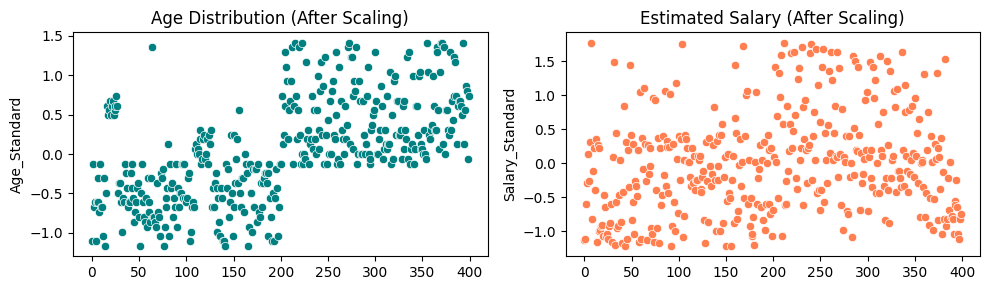

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)  # 1 row, 2 columns, 1st plot
sns.scatterplot(df_scaled_robust['Age_Standard'],color='teal')
plt.title('Age Distribution (After Scaling)')

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(df_scaled_robust['Salary_Standard'],color='coral')
plt.title('Estimated Salary (After Scaling)')

plt.tight_layout()
plt.show()